<a href="INSERT_colab_R_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSERT_exercise_1_b

INSERT_heading_sampling_binomial

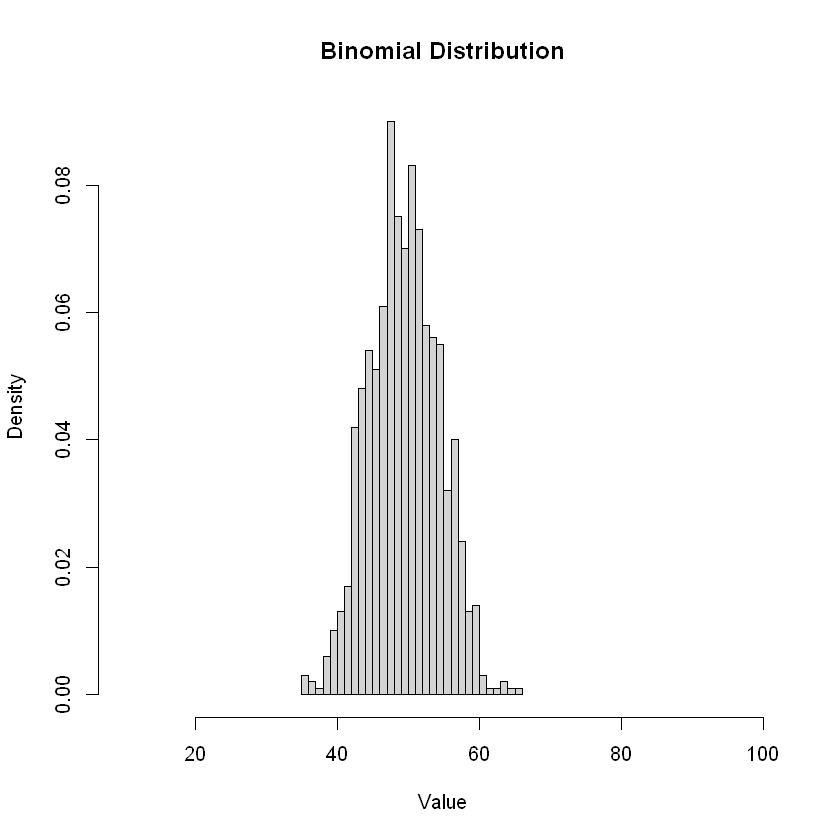

In [ ]:
num_points = 1000 # number of points to sample
n = 100 		  # number of trials
p = 0.5 		  # probability of success

set.seed(42) # fixing the seed for reproducibility

# sampling from a binomial distribution
X <- rbinom(num_points, prob = p, size = n)

# plotting 
xlim_from <- 10 
xlim_to <- 100 
num_breaks <- 25

hist(X, breaks = 25, xlim = c(xlim_from, xlim_to), freq = FALSE,
	main = "Binomial Distribution",
	xlab = "Value", ylab = "Density")

INSERT_heading_various_gaussian_distributions

In [ ]:
true_exp <- n * p 
true_variance <- n * p * (1 - p) 
true_sd <- sqrt(true_variance) 

# define different Normal density functions
normal_optimal <- function(x) dnorm(x, mean = true_exp, sd = true_sd)
normal_shift_left <- function(x) dnorm(x, mean = true_exp - 10, sd = true_sd)
normal_scale_increase <- function(x) dnorm(x, mean = true_exp, sd = true_sd*2)
normal_shift_right_scale_decrease <- function(x) dnorm(x, mean = true_exp + 20, sd = p*(1-p))


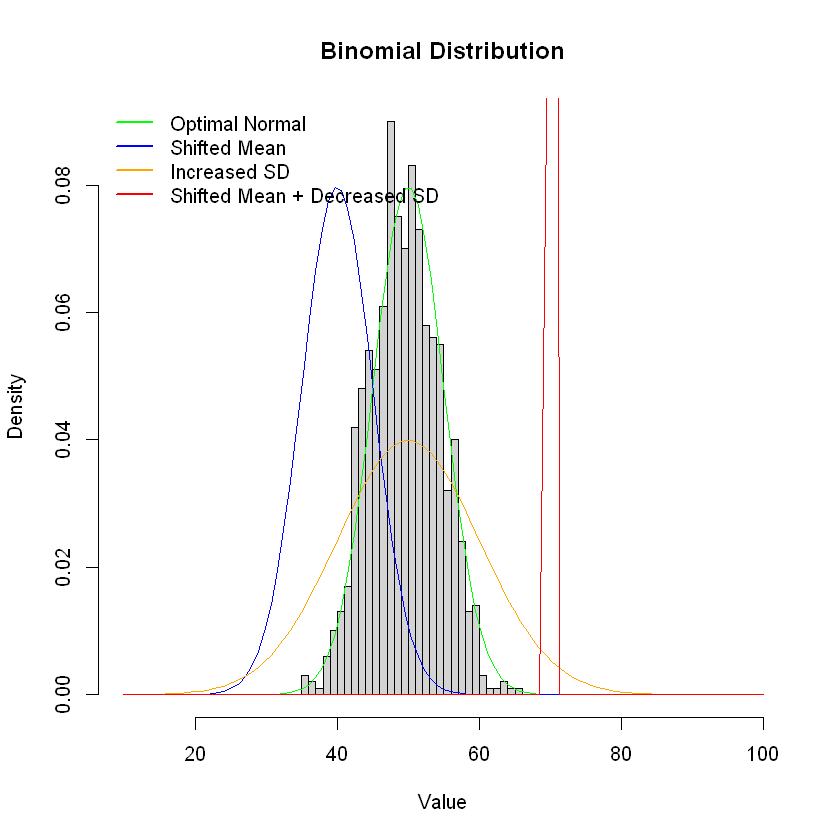

In [9]:
hist(X, breaks = num_breaks, xlim = c(xlim_from, xlim_to), freq = FALSE,
	main = "Binomial Distribution",
	xlab = "Value", ylab = "Density")

curve(normal_optimal, from = xlim_from, to = xlim_to, add = TRUE, col = "green")
curve(normal_shift_left, from = xlim_from, to = xlim_to, add = TRUE, col = "blue")
curve(normal_scale_increase, from = xlim_from, to = xlim_to, add = TRUE, col = "orange")
curve(normal_shift_right_scale_decrease, from = xlim_from, to = xlim_to, add = TRUE, col = "red")

# hope a bit of overlap with the red curves label is not a big deal :-)
legend("topleft",
	legend = c("Optimal Normal", "Shifted Mean", "Increased SD", "Shifted Mean + Decreased SD"),
	col = c("green", "blue", "orange", "red"),
	lwd = 2,
	bty = "n")

INSERT_kl_divergence

In [8]:
kld_value <- function(mu, sigma2)
{
	0.5 * log(sigma2) + 
    0.5 * (sigma2)^(-1) * (true_variance + (true_exp - mu)^2)
}

optimal_green <- kld_value(true_exp, true_variance)
cat("Optimal Normal (green):", optimal_green, "\n")

shift_blue <- kld_value(true_exp - 10, true_variance)
cat("Shifted Mean (blue):", shift_blue, "\n")

scale_increase_orange <- kld_value(true_exp, true_variance * 4)
cat("Increased SD (orange):", scale_increase_orange, "\n")

right_scale_decrease_red <- kld_value(true_exp + 20, (p * (1 - p))^2)
cat("Shifted Mean + Decreased SD (red):", right_scale_decrease_red, "\n")


Optimal Normal (green): 2.109438 
Shifted Mean (blue): 4.109438 


Increased SD (orange): 2.427585 
Shifted Mean + Decreased SD (red): 3398.614 


INSERT_conclusion_1_b

INSERT_exercise_1_c

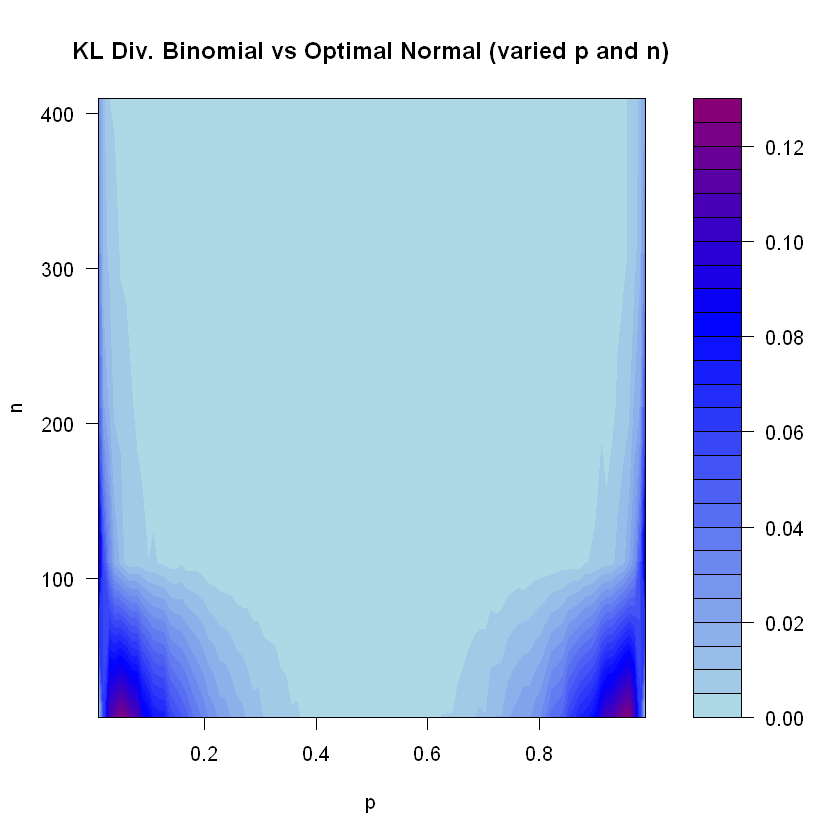

In [ ]:
p_seq <- seq(0.01, 0.99, l = 100)
n_seq <- seq(10, 500, by = 100)
B <- 10000

kld_value_approx <- function(n,p){ 
	# sample a large number of data points from true distribution
	x <- rbinom(B, prob = p, size = n)
  
	# approximate the mean; threshold values to 0 if < 0 due
	# to the approximation
	pmax(
		mean(
			dbinom(x, prob = p, size = n, log = TRUE) - 
			dnorm(x, mean = n*p, sd = sqrt(n*p*(1-p)), log = TRUE),
			na.rm = TRUE
		),
	0)
}

kld_val <- sapply(n_seq, function(this_n) 
	sapply(p_seq, function(this_p) kld_value_approx(this_n, this_p)))

cols = rev(colorRampPalette(c('darkred','red','blue','lightblue'))(50))

filled.contour(
	x = p_seq, y = n_seq, z = kld_val, 
	xlab = "p", ylab = "n", 
	col = cols,
	main = "KL Div. Binomial vs Optimal Normal (varied p and n)"
)
